<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew.

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [2]:
#ANSWER
titanic_csv = pd.read_csv('/Users/melvinlewis/Downloads/titanic_train.csv',index_col='PassengerId')

#Display the head of the DataFrame
print(titanic_csv.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values.

In [3]:
#ANSWER
print(titanic_csv.dtypes)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [4]:
titanic_csv.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
#Replace null values in the 'Age' column with 0 inplace=True
titanic_csv['Age'].fillna(0, inplace = True)

#Verify that the null values in the 'Age' column have been replaced
titanic_csv.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
#Replace null values in the 'Cabin' column with 0 inplace=True
titanic_csv['Cabin'].fillna(0, inplace = True)

#Verify that the null values in the 'Cabin' column have been replaced
titanic_csv.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

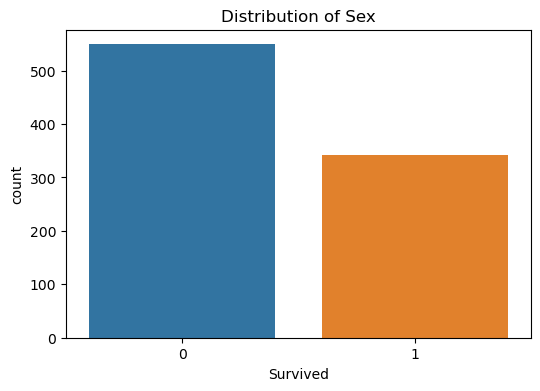

In [7]:
#Create a bar plot for the 'Sex' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_csv)
plt.title('Distribution of Sex')
plt.show()

In [8]:
#def facetgridplot(train, var):
   # facet = sns.FacetGrid(train, hue="Survived", aspect=4)
   # facet.map(sns.kdeplot, var, shade= True)
   # facet.set(xlim=(0, train[var].max()))
   # facet.add_legend()
   # plt.show();

In [9]:
def bar_chart(train, feature):
    survived = train[train['Survived']==1][feature].value_counts(normalize=True)*100
    dead = train[train['Survived']==0][feature].value_counts(normalize=True)*100
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

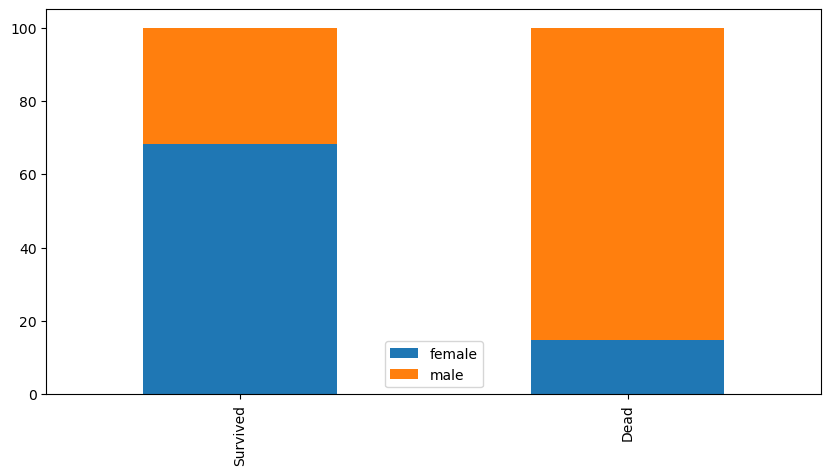

In [10]:
bar_chart(titanic_csv, 'Sex')

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [11]:
data = titanic_csv
Y = data['Survived']
feature_cols = ['Pclass', 'Parch']
X = data[feature_cols]

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [12]:
# ANSWER
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [13]:
#ANSWER
#Create Model
logreg = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [14]:
#ANSWER
#Fit Model
logreg.fit(x_train, y_train)

LogisticRegression()

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [15]:
# ANSWER
logreg.coef_

array([[-0.90824213,  0.33432156]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [16]:
# ANSWER
logreg.intercept_

array([1.40820621])

We can create tuples of the predictor names and coefficients like this:

In [17]:
#ANSWER
print(set(zip(feature_cols, logreg.coef_[0])))

{('Parch', 0.334321555147779), ('Pclass', -0.9082421341469831)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [18]:
for col in zip(x_train.columns, logreg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.908242
Parch       +0.334322


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [19]:
#ANSWER
logreg.score(x_train, y_train)

0.6924157303370787

In [20]:
logreg.fit(x_test, y_test)

LogisticRegression()

What is the  `accuracy_score` for the test data?

In [21]:
logreg.score(x_test, y_test)

0.659217877094972

What can we say about this result?

ANSWER
- ...
- ...

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [22]:
#ANSWER
titanic_csv['Age'].fillna(titanic_csv['Age'].mean(),inplace=True)

In [23]:
titanic_csv['Age'].isnull().sum()


0

In [24]:
data = titanic_csv
feature_col = 'Pclass''Parch''Age'

Y = data['Survived']
feature_cols = ['Pclass', 'Parch']
X = data[feature_cols]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)

In [26]:
#Build Model

logreg = LogisticRegression()

#Fit Model

logreg.fit(x_train,y_train)

#Score

logreg.score(x_test,y_test)

0.664179104477612

So, including age did little to reduce the variance in our model. Why might this be?

In [27]:
print(titanic_csv.corr())

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481  0.010539 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.361353  0.083081  0.018443 -0.549500
Age       0.010539 -0.361353  1.000000 -0.184664 -0.048786  0.135516
SibSp    -0.035322  0.083081 -0.184664  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.048786  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.135516  0.159651  0.216225  1.000000


/var/folders/kq/ggs5ns1d1nzb0klns1rfyss40000gn/T/ipykernel_5150/1390443582.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(titanic_csv.corr())


ANSWER

- ...
- ...
- ...

Let's see where the model is going wrong by showing the Confusion Matrix:

In [28]:
#ANSWER
y_pred_class = logreg.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[125  28]
 [ 62  53]]


Nb. Here is how `confusion_matrix` arranges its output:

In [29]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

ANSWER: ...

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

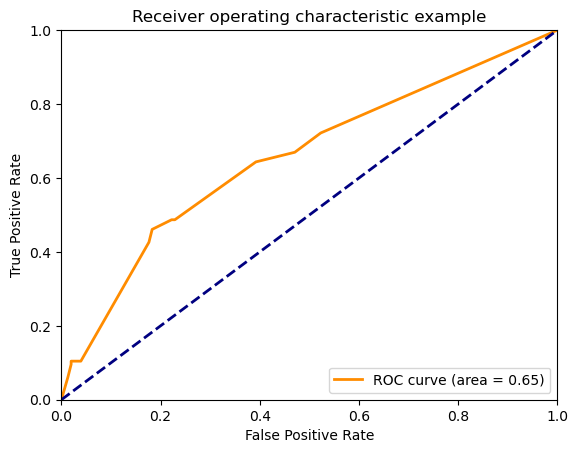

In [30]:
#Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(x_test)[:,1]

#Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

#Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

#Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [31]:
titanic_with_dummies = pd.get_dummies(data = titanic_csv, columns = ['Sex', 'Embarked', 'Pclass'],prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,1,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,1,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,0,1,0,0,1


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first variable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [32]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

In [33]:
titanic_with_dummies.corr()

/var/folders/kq/ggs5ns1d1nzb0klns1rfyss40000gn/T/ipykernel_5150/185264677.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_with_dummies.corr()


,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
Survived,1.000000,0.010539,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660,0.285904,0.093349,-0.322308
Age,0.010539,1.000000,-0.184664,-0.048786,0.135516,-0.024978,0.024978,0.001246,-0.237586,0.140578,0.293485,0.124510,-0.354201
SibSp,-0.035322,-0.184664,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941,-0.054582,-0.055932,0.092548
Parch,0.081629,-0.048786,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036,-0.017633,-0.000734,0.015790
Fare,0.257307,0.135516,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603,0.591711,-0.118557,-0.413333
Sex_female,0.543351,-0.024978,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722,0.098013,0.064746,-0.137143
Sex_male,-0.543351,0.024978,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722,-0.098013,-0.064746,0.137143
Embarked_C,0.168240,0.001246,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359,0.296423,-0.125416,-0.153329
Embarked_Q,0.003650,-0.237586,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.496624,-0.155342,-0.127301,0.237449
Embarked_S,-0.155660,0.140578,0.070941,0.063036,-0.166603,-0.125722,0.125722,-0.778359,-0.496624,1.000000,-0.170379,0.192061,-0.009511


Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [34]:
# ANSWER
# Set Feature Both Numerical, Categorical
feature_cols = ['Age','SibSp','Sex_female','Pclass_1','Pclass_2']
x = titanic_with_dummies[feature_cols]
x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

Plot the ROC curve for the new model:

In [35]:
# ANSWER
logreg = LogisticRegression()

#fit Model

logreg.fit(x_train,y_train)

#Score

logreg.score(x_train,y_train)

0.6924157303370787



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



